In [3]:
# Importing required libraries
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [6]:
# Load datasets
train_df = pd.read_csv('D:/MS/Spring_2025/Data-Mining/Input/train.csv')
test_df = pd.read_csv('D:/MS/Spring_2025/Data-Mining/Input/test.csv')
combine = [train_df, test_df]

In [7]:
# Data Preprocessing
train_df = train_df.drop(['Ticket', 'Cabin', 'Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin', 'Name'], axis=1)
combine = [train_df, test_df]

In [8]:
# Encoding 'Sex'
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({'female': 1, 'male': 0}).astype(int)

In [9]:
# Fill missing 'Embarked' with mode
freq_port = train_df.Embarked.dropna().mode()[0]
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    dataset['Embarked'] = dataset['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)

In [10]:
# Log Transformation for 'Fare'
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
train_df['Fare'] = train_df['Fare'].map(lambda x: np.log(x) if x > 0 else 0)

C:\Users\Varshini\AppData\Local\Temp\ipykernel_29220\1593275737.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)


In [11]:
# Advanced Imputation for 'Age'
imputer = IterativeImputer()
train_df['Age'] = imputer.fit_transform(train_df[['Age']])

In [12]:
# Scaling 'Age'
scaler = StandardScaler()
train_df['Age'] = scaler.fit_transform(train_df[['Age']])

In [13]:
# Feature Interaction: Age * Fare, Fare * Pclass
train_df['Age*Fare'] = train_df['Age'] * train_df['Fare']
train_df['Fare*Pclass'] = train_df['Fare'] * train_df['Pclass']

In [14]:
# Preparing Data for Modeling
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test = test_df.drop("PassengerId", axis=1).copy()

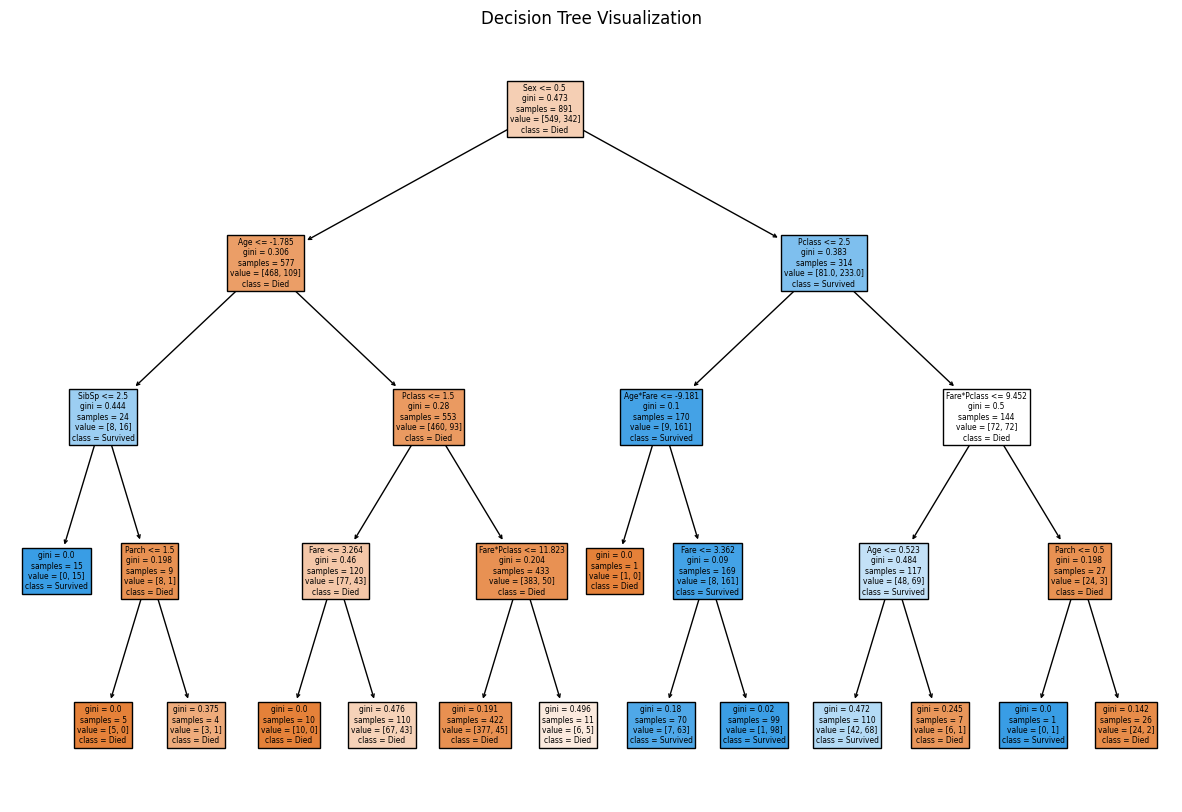

In [15]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Define features (X) and target variable (y)
X = train_df.drop(columns=["Survived"])  # Features
y = train_df["Survived"]  # Target variable

# Train the Decision Tree model with fine-tuning
decision_tree = DecisionTreeClassifier(max_depth=4, random_state=42)
decision_tree.fit(X, y)

# Plot the Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(decision_tree, feature_names=X.columns, class_names=["Died", "Survived"], filled=True)
plt.title("Decision Tree Visualization")
plt.show()


In [17]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation for Decision Tree model
dt_cv_scores = cross_val_score(decision_tree, X, y, cv=5, scoring="accuracy")

# Compute the average accuracy
dt_avg_accuracy = dt_cv_scores.mean()
print(f"Decision Tree Average Accuracy: {dt_avg_accuracy:.4f}")


Decision Tree Average Accuracy: 0.7914


In [18]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model
random_forest = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=42)
random_forest.fit(X, y)

# Perform 5-fold cross-validation for Random Forest model
rf_cv_scores = cross_val_score(random_forest, X, y, cv=5, scoring="accuracy")

# Compute the average accuracy
rf_avg_accuracy = rf_cv_scores.mean()
print(f"Random Forest Average Accuracy: {rf_avg_accuracy:.4f}")


Random Forest Average Accuracy: 0.8137


In [24]:
import pandas as pd
from IPython.display import display

# Store model comparison results in a DataFrame
model_comparison = pd.DataFrame({
    "Model": ["Decision Tree", "Random Forest"],
    "Average Accuracy": [dt_avg_accuracy, rf_avg_accuracy]
})

# Display the model comparison table
print("Model Comparison:")
display(model_comparison)

# Print final observations and conclusion
print("\nObservations and Conclusion:")
print(f"Decision Tree Accuracy: {dt_avg_accuracy:.4f}")
print(f"Random Forest Accuracy: {rf_avg_accuracy:.4f}\n")

if rf_avg_accuracy > dt_avg_accuracy:
    print("Random Forest performs better than Decision Tree!")
    print("Random Forest combines multiple trees, reducing overfitting.")
    print("It generalizes better compared to a single Decision Tree.")
else:
    print("Decision Tree performs similarly to Random Forest.")
    print("However, Random Forest is still preferable due to its stability.")


Model Comparison:


,Model,Average Accuracy
0,Decision Tree,0.791350
1,Random Forest,0.813741



Observations and Conclusion:
Decision Tree Accuracy: 0.7914
Random Forest Accuracy: 0.8137

Random Forest performs better than Decision Tree!
Random Forest combines multiple trees, reducing overfitting.
It generalizes better compared to a single Decision Tree.
